### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

**1. Read in the `coupons.csv` file.**




In [350]:
data = pd.read_csv('data/coupons.csv')

In [351]:
pd.options.display.max_columns = 26
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data.**

**Observations from data.info() output**

    1. Columns 'car','Bar','CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50' has missing values.
    2. Spelling of column 'passanger' is incorrect

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**3. Decide what to do about your missing data -- drop, replace, other...**

    1. Drop column 'car' as the information is missing for majority of the rows
    2. Drop rows with missing values for columns 'Bar','CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50' as its critical information in determining whether a coupon is accepted or not. 

In [353]:
# Create a new data fraome data_clean without column 'car'
data_clean = data.drop(columns = ['car'])

# Drop all the rows that has missing values
data_clean = data_clean.dropna()

**4. What proportion of the total observations chose to accept the coupon?**

56.93% of observations chose to accept coupons



In [354]:
# Find the sum of column 'Y' and divide by number of rows to find the proportion. Multiply by 100 to get percentage
# and round it to two decimal places
Percent_coupon_accepted = round((data_clean['Y'].sum()/len(data_clean))*100,2)
Percent_coupon_accepted

56.93

**5. Use a bar plot to visualize the `coupon` column.**

Text(0.5, 1.0, 'Fig-1 : Bar chart of coupon column')

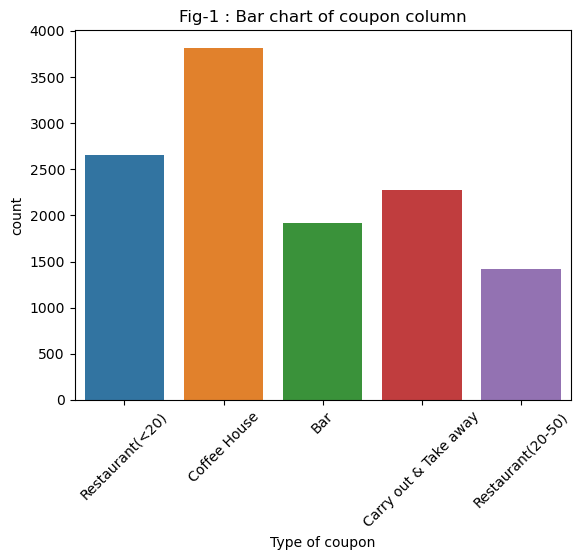

In [355]:
# use seaborn's countplot 
sns.countplot(data_clean, x='coupon')

#rotate xlabels to avoid overlap
plt.xticks(rotation=45)

#Set xlabel name and title
plt.xlabel('Type of coupon')
plt.title('Fig-1 : Bar chart of coupon column')

**6. Use a histogram to visualize the temperature column.**

Text(0.5, 0, 'Temperature in Fahrenheit')

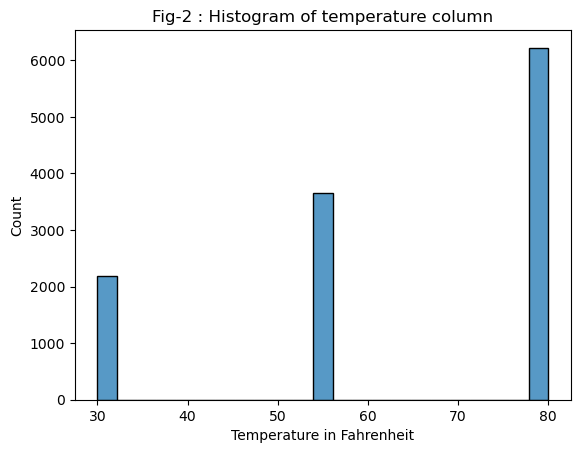

In [356]:
sns.histplot(data_clean,x='temperature')
plt.title('Fig-2 : Histogram of temperature column')
plt.xlabel('Temperature in Fahrenheit')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

**1. Create a new `DataFrame` that contains just the bar coupons.**

In [357]:
#data_bar contains only bar coupons

data_bar = data_clean.query("coupon == 'Bar'")

**2. What proportion of bar coupons were accepted?**

41.19% of bar coupons are accepted


In [358]:
# Find the sum of column 'Y' and divide by number of rows to find the proportion. Multiply by 100 to get percentage
# and round it to two decimal places
Percent_bar_coupon_accepted = round((data_bar['Y'].sum()/len(data_bar))*100,2)
print(str(Percent_bar_coupon_accepted) + "% of bar coupons are accepted")

41.19% of bar coupons are accepted


**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**

From the chart, its clear that people who visit bar more than 3 times a month are accepting bar coupons more

,Bar,Y
0,gt3,76.165803
1,lt3,37.267442


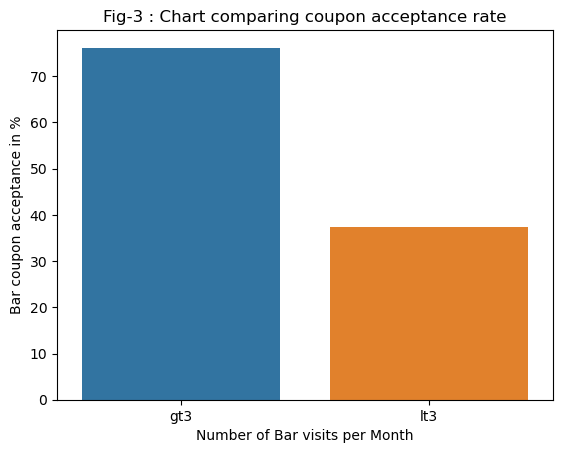

In [365]:
#Rename the values for 'Bar' column such that they fall into two buckets
# lt3 --> less than 3 times a month
# gt3 --> greater than 3 times a month
data_bar.loc[:,'Bar'] = data_bar.loc[:,'Bar'].str.replace('never','lt3')
data_bar.loc[:,'Bar'] = data_bar.loc[:,'Bar'].str.replace('less1','lt3')
data_bar.loc[:,'Bar'] = data_bar.loc[:,'Bar'].str.replace('1~3','lt3')
data_bar.loc[:,'Bar'] = data_bar.loc[:,'Bar'].str.replace('4~8','gt3')
data_bar.loc[:,'Bar'] = data_bar.loc[:,'Bar'].str.replace('gt8','gt3')

# Group by the defined no.of visits and find the sum of coupons that are accepted in each group
data_bar_group_accept = data_bar.groupby('Bar').sum()['Y']

# Group by the defined no.of visits and find the sum of coupons in each category
data_bar_group_count = data_bar.groupby('Bar')['Y'].count()

#Divide both the above DFs to get acceptance rate
data_bar_group_ratios = (data_bar_group_accept/data_bar_group_count)*100
data_bar_group_ratios = data_bar_group_ratios.reset_index()

sns.barplot(data_bar_group_ratios, x = 'Bar', y='Y')
plt.xlabel('Number of Bar visits per Month')
fig.set(xticklabels=['> 3','< 3'])
plt.ylabel('Bar coupon acceptance in %')
plt.title('Fig-3 : Chart comparing coupon acceptance rate')
data_bar_group_ratios

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**

From the chart acceptance rate is slighlty less for interested group


,Group,Y
0,Age_25+_Bar_1+,68.982630
1,Others,33.774834


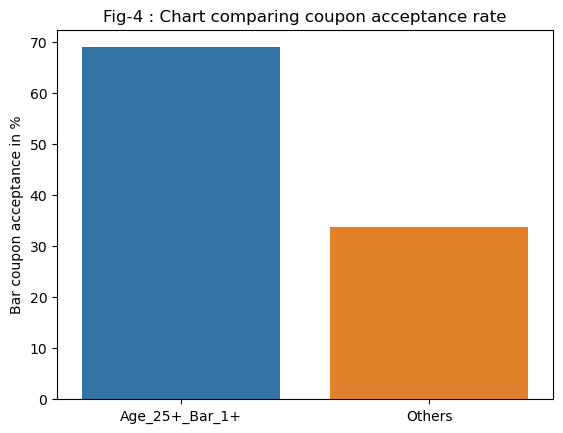

In [364]:
data_bar = data_clean.query("coupon == 'Bar'")

#Create new dataframe 'data_bar_age_gt_25_and_gt1' with column 'Y' alone, by applying query on 'data_bar' 
#to get the drivers who are over 25 and visit bar atleast once a month
data_bar_age_gt_25_and_gt1 = data_bar.query(" (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age != '21' and age != 'below21')")[['Y']]

#New dataframe 'data_bar_age_gt_25_and_gt1_others' for the rest
data_bar_age_gt_25_and_gt1_others =  data_bar.query(" ((Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age != '21' and age != 'below21')) == False")[['Y']]

# Create a new column Group and give it same identifier 'Age_25+_Bar_1+'  for all rows
data_bar_age_gt_25_and_gt1.loc[:,'Group'] = 'Age_25+_Bar_1+' 

#Create a new column Group and give it same identifier 'Others' for all rows
data_bar_age_gt_25_and_gt1_others.loc[:,'Group'] = 'Others' 

#Outer Merge both the above dataframes using columns 'Group' and 'Y'
data_bar_merged =pd.merge(left=data_bar_age_gt_25_and_gt1, right = data_bar_age_gt_25_and_gt1_others, left_on = ['Group', 'Y'], right_on = ['Group','Y'], how='outer')

#Perform groupby on column 'Group' and divide sum with count of column 'Y' to get acceptance rate
acceptance_rate = (data_bar_merged.groupby('Group')[['Y']].sum()/data_bar_merged.groupby('Group')[['Y']].count())*100

acceptance_rate = acceptance_rate.reset_index()
sns.barplot(acceptance_rate, x = 'Group', y='Y')
plt.xlabel('')
plt.ylabel('Bar coupon acceptance in %')
plt.title('Fig-4 : Chart comparing coupon acceptance rate')
acceptance_rate

***5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.***


Acceptance rate is similar to above


,Group,Y
0,Bar_1+_no_kids_no_FFF,68.531469
1,Others,29.530201


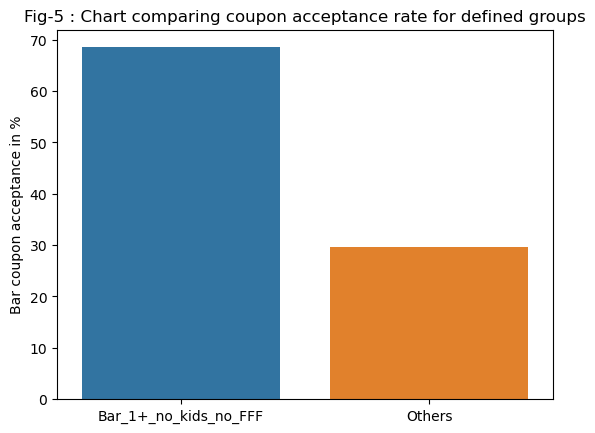

In [406]:
data_bar = data_clean.query("coupon == 'Bar'")

#Create new dataframe 'data_group' with column 'Y' alone, by applying query on 'data_bar' 
#to get the drivers who visit bar atleast once a month and had passengers that were not a kid and occupations other than 
#farming, fishing or forestry
data_bar_group = data_bar.query(" (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passanger != 'Kid\(s\)') \
                            and (occupation != 'Farming Fishing & Forestry')")[['Y']]

#New dataframe 'data_bar_others' for the rest
data_bar_others =  data_bar.query(" ((Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passanger != 'Kid\(s\)') \
                            and (occupation != 'Farming Fishing & Forestry')) == False")[['Y']]

# Create a new column Group and give it same identifier 'Age_25+_Bar_1+'  for all rows
data_bar_group.loc[:,'Group'] = 'Bar_1+_no_kids_no_FFF' 

#Create a new column Group and give it same identifier 'Others' for all rows
data_bar_others.loc[:,'Group'] = 'Others' 

#Outer Merge both the above dataframes using columns 'Group' and 'Y'
data_bar_merged =pd.merge(left=data_bar_group, right = data_bar_others, left_on = ['Group', 'Y'], right_on = ['Group','Y'], how='outer')

#Perform groupby on column 'Group' and divide sum with count of column 'Y' to get acceptance rate
acceptance_rate = (data_bar_merged.groupby('Group')[['Y']].sum()/data_bar_merged.groupby('Group')[['Y']].count())*100

acceptance_rate = acceptance_rate.reset_index()
sns.barplot(acceptance_rate, x = 'Group', y='Y')
plt.xlabel('')
plt.ylabel('Bar coupon acceptance in %')
plt.title('Fig-5 : Chart comparing coupon acceptance rate for defined groups')
acceptance_rate

**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

From the bar chart (Fig-6) its evident that acceptance rate for second group is high i.e who go to bar more than once a month and under the age of 30



,Group,Y
0,Group-1,68.531469
1,Group-2,71.951220
2,Group-3,45.645646


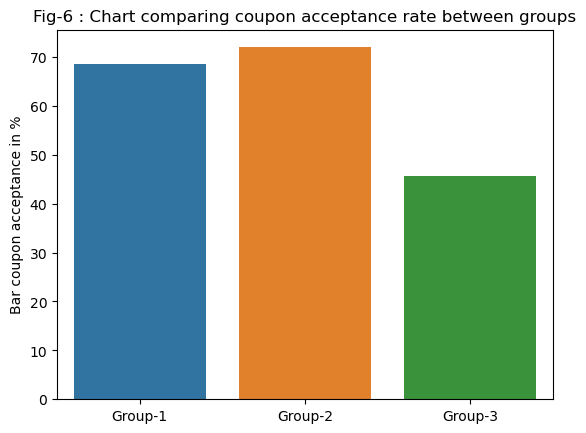

In [405]:
data_bar = data_clean.query("coupon == 'Bar'")

#Create new dataframe 'data_group' with column 'Y' alone, by applying query on 'data_bar' 
#to get the drivers who visit bar atleast once a month and had passengers that were not a kid and occupations other than 
#farming, fishing or forestry
data_bar_group1 = data_bar.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passanger != 'Kid\(s\)') and (maritalStatus != 'Widowed')")[['Y']]

#New dataframe 'data_bar_others' for the rest
data_bar_group2 =  data_bar.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age == '21' or age == '26' or age == 'below21')")[['Y']]

data_bar_group3 = data_bar.query("(RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income == 'Less than $12500' or income == '$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999')")[['Y']]

# Create a new column Group and give it same identifier 'Age_25+_Bar_1+'  for all rows
data_bar_group1.loc[:,'Group'] = 'Group-1' 

#Create a new column Group and give it same identifier 'Others' for all rows
data_bar_group2.loc[:,'Group'] = 'Group-2' 

#Create a new column Group and give it same identifier 'Others' for all rows
data_bar_group3.loc[:,'Group'] = 'Group-3' 

#Outer Merge both the above dataframes using columns 'Group' and 'Y'
data_bar_temp =pd.merge(left=data_bar_group1, right = data_bar_group2, left_on = ['Group', 'Y'], right_on = ['Group','Y'], how='outer')

data_bar_merged =pd.merge(left=data_bar_temp, right = data_bar_group3, left_on = ['Group', 'Y'], right_on = ['Group','Y'], how='outer')

#Perform groupby on column 'Group' and divide sum with count of column 'Y' to get acceptance rate
acceptance_rate = (data_bar_merged.groupby('Group')[['Y']].sum()/data_bar_merged.groupby('Group')[['Y']].count())*100

acceptance_rate = acceptance_rate.reset_index()
sns.barplot(acceptance_rate, x = 'Group', y='Y')
plt.xlabel('')
plt.ylabel('Bar coupon acceptance in %')
plt.title('Fig-6 : Chart comparing coupon acceptance rate between groups')
acceptance_rate

**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**


Drivers who go to bar more than once and without kids as passengers are more likely to accep coupons provided they dont fall under low income category 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**For independent investigation, selecting a coupon whose acceptance rate is less. From following plot its 'Restaurant(20-50)'** 

,coupon,Y
0,Bar,41.191845
1,Carry out & Take away,73.771930
2,Coffee House,49.633124
3,Restaurant(20-50),44.601270
4,Restaurant(<20),70.900867


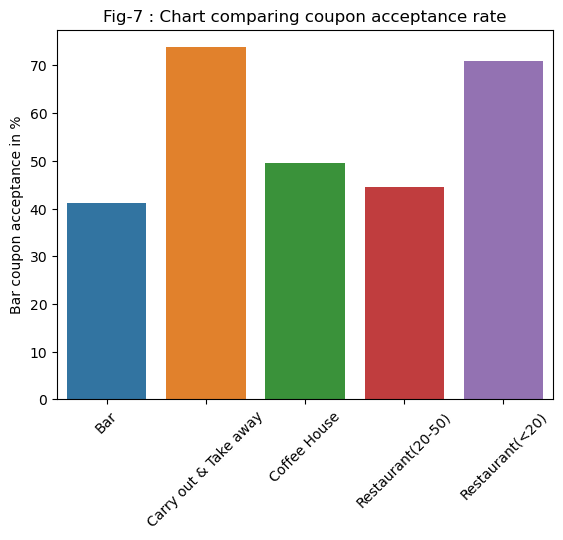

In [404]:
#Perform groupby on column 'Group' and divide sum with count of column 'Y' to get acceptance rate
acceptance_rate = (data_clean.groupby('coupon')[['Y']].sum()/data_clean.groupby('coupon')[['Y']].count())*100

acceptance_rate = acceptance_rate.reset_index()
sns.barplot(acceptance_rate, x = 'coupon', y='Y')
plt.xlabel('')
plt.ylabel('Bar coupon acceptance in %')
plt.title('Fig-7 : Chart comparing coupon acceptance rate')
plt.xticks(rotation=45)
acceptance_rate

### Investigating Restaurant(20-50) coupon

Create a dataframe with only Restaurant(20-50) coupons

In [651]:
data_rst = data_clean.query("coupon == 'Restaurant(20-50)' and weather == 'Sunny' and temperature == 80 and expiration == '1d'")

,passanger,Y
0,Alone,0.526882
1,Friend(s),0.485714
2,Kid(s),0.436364
3,Partner,0.777778


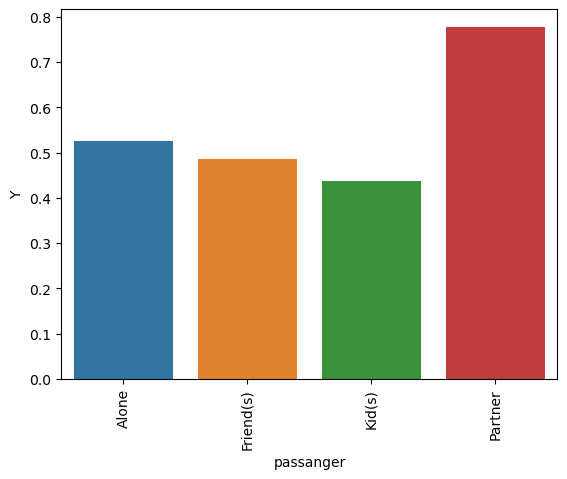

In [652]:
stre= 'passanger'
acceptance_rate = data_rst.groupby(stre)[['Y']].sum()/data_rst.groupby(stre)[['Y']].count()
acceptance_rate = acceptance_rate.reset_index()
acceptance_rate_others = data_others.groupby(stre)[['Y']].sum()/data_others.groupby(stre)[['Y']].count()
acceptance_rate_others = acceptance_rate_others.reset_index()
sns.barplot(acceptance_rate, x = stre, y='Y')
#sns.countplot(data_rst, x = stre)
plt.xticks(rotation=90)
acceptance_rate

In [653]:
cols = data_rst.columns
cols

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

C:\Users\nsatish\AppData\Local\Temp\ipykernel_22836\4117253973.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

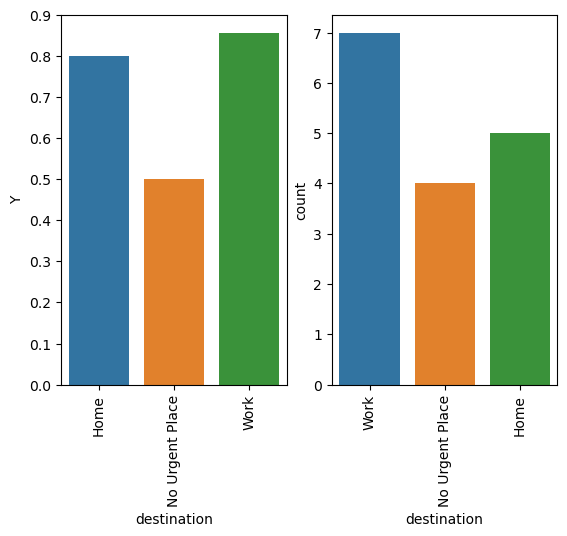

<Figure size 640x480 with 0 Axes>

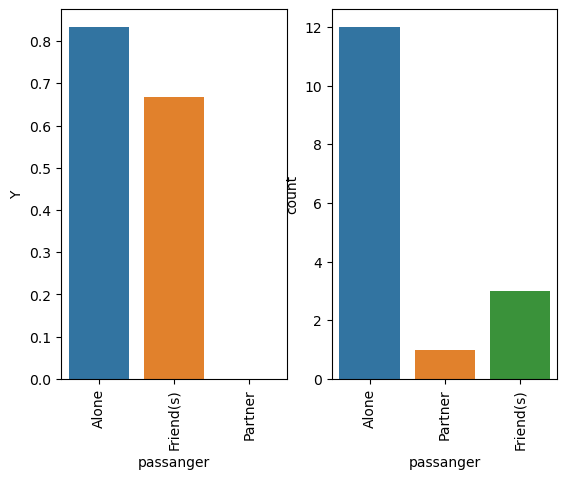

<Figure size 640x480 with 0 Axes>

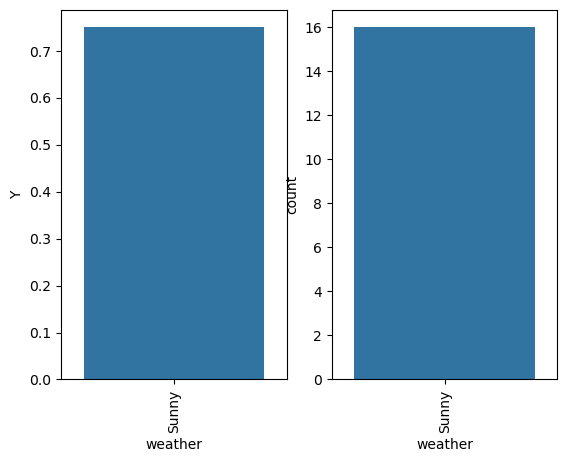

<Figure size 640x480 with 0 Axes>

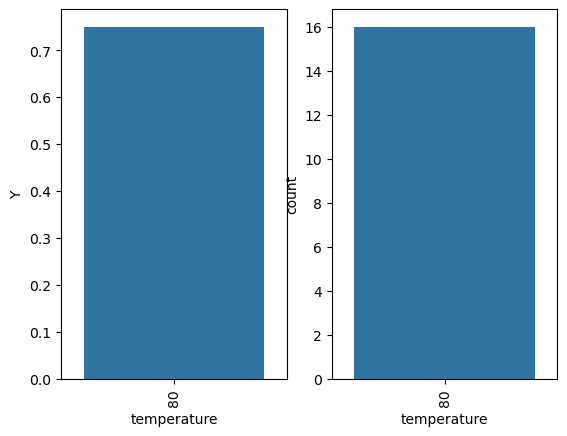

<Figure size 640x480 with 0 Axes>

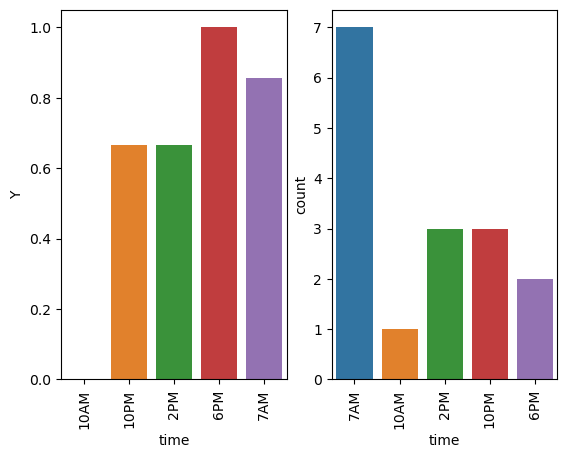

<Figure size 640x480 with 0 Axes>

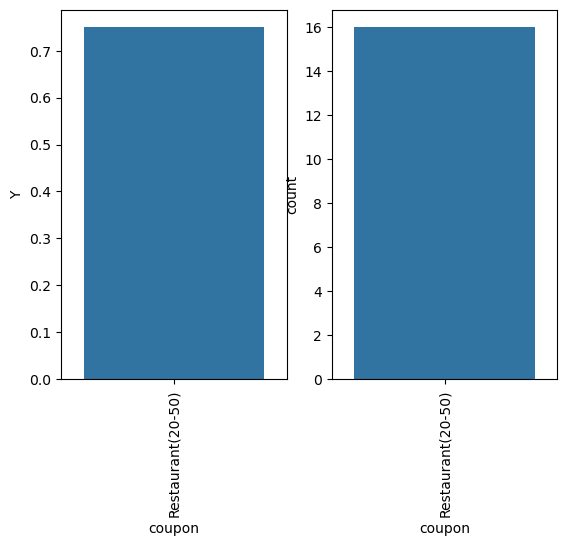

<Figure size 640x480 with 0 Axes>

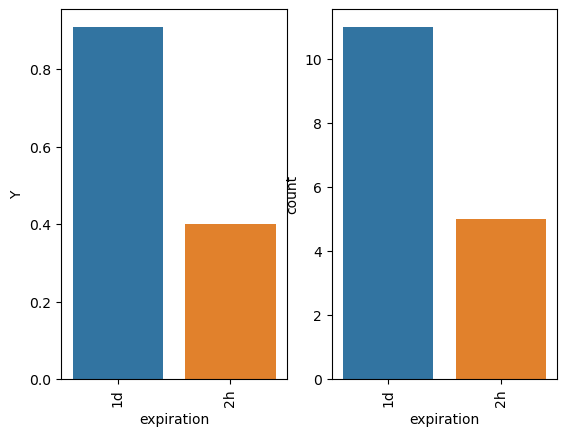

<Figure size 640x480 with 0 Axes>

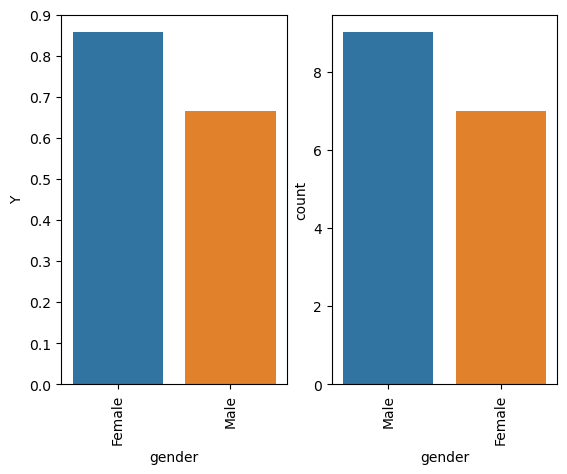

<Figure size 640x480 with 0 Axes>

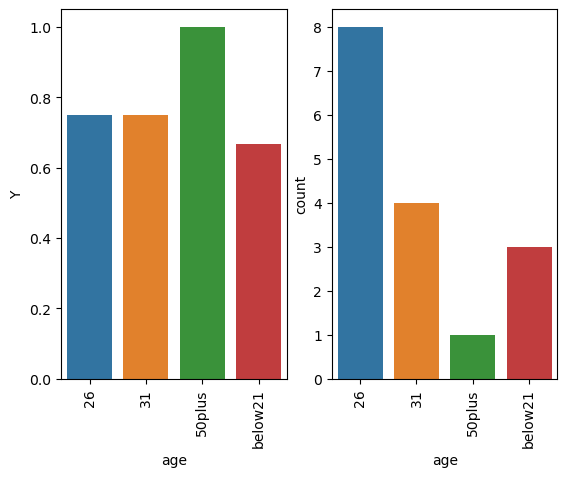

<Figure size 640x480 with 0 Axes>

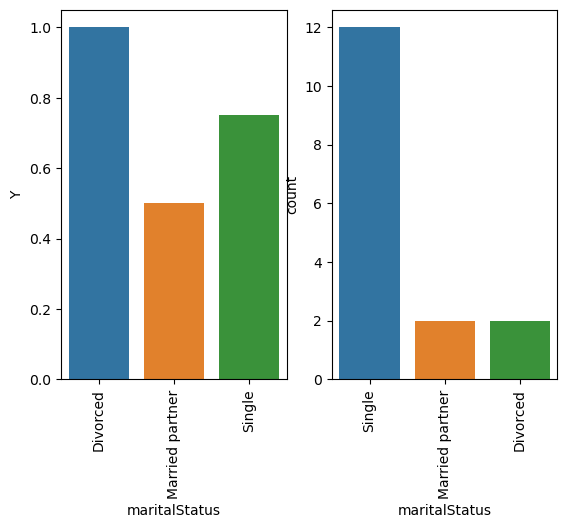

<Figure size 640x480 with 0 Axes>

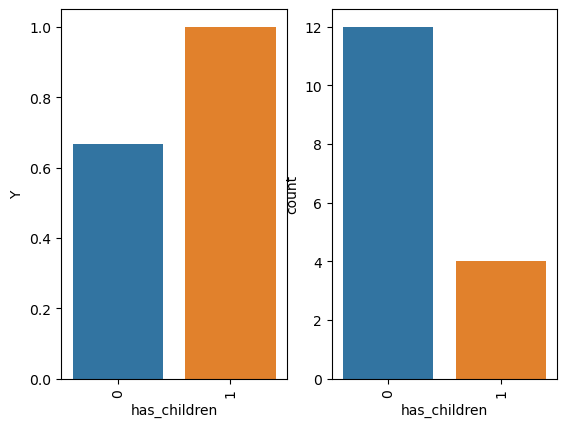

<Figure size 640x480 with 0 Axes>

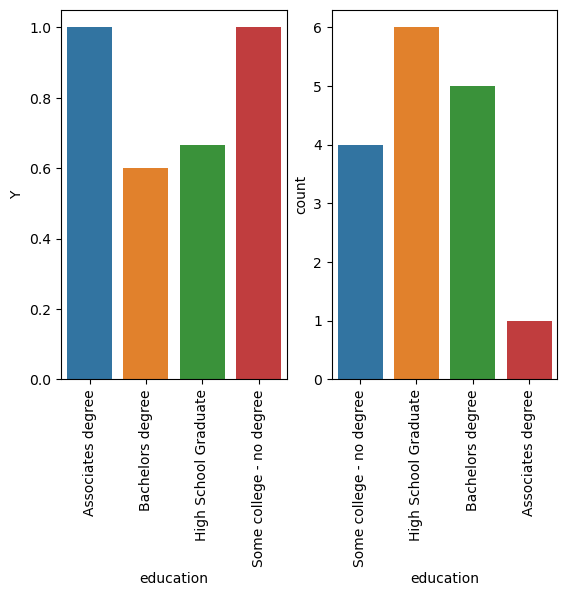

<Figure size 640x480 with 0 Axes>

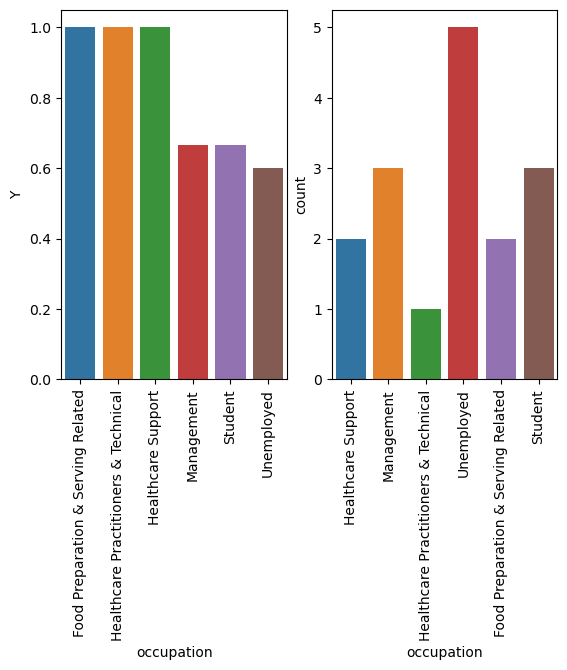

<Figure size 640x480 with 0 Axes>

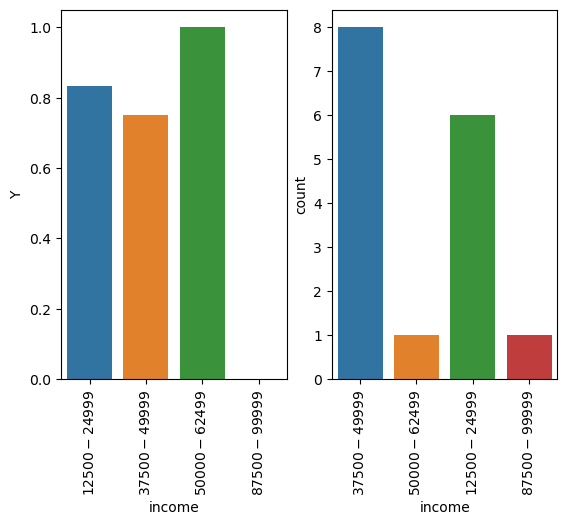

<Figure size 640x480 with 0 Axes>

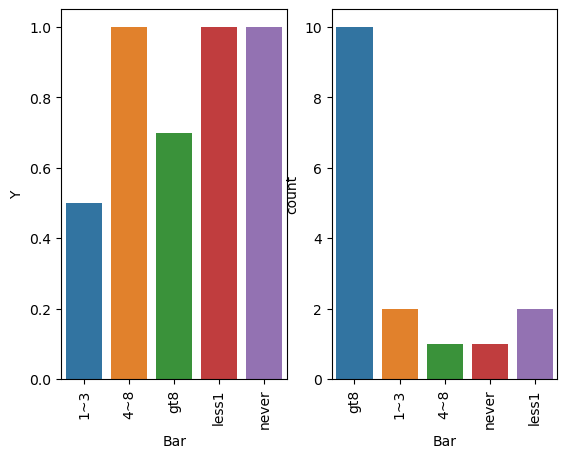

<Figure size 640x480 with 0 Axes>

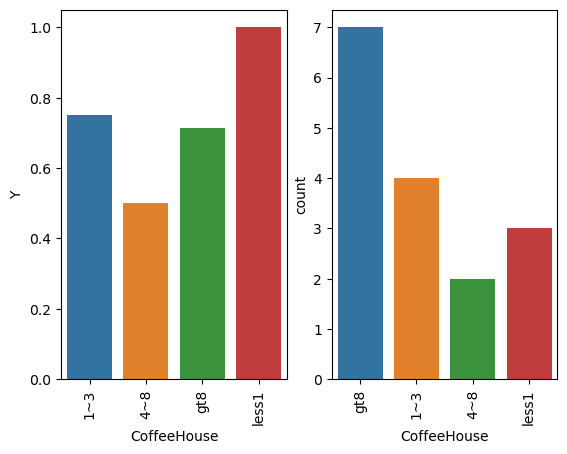

<Figure size 640x480 with 0 Axes>

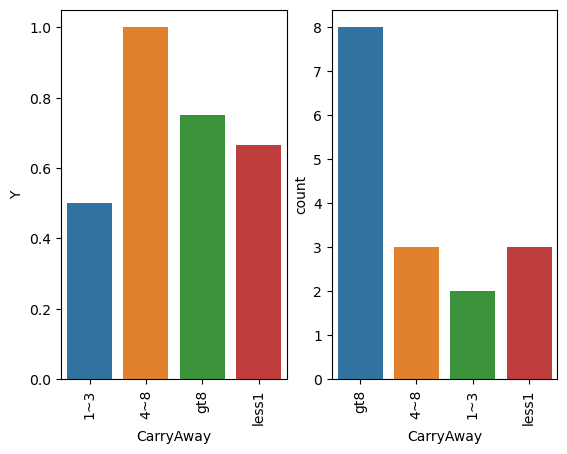

<Figure size 640x480 with 0 Axes>

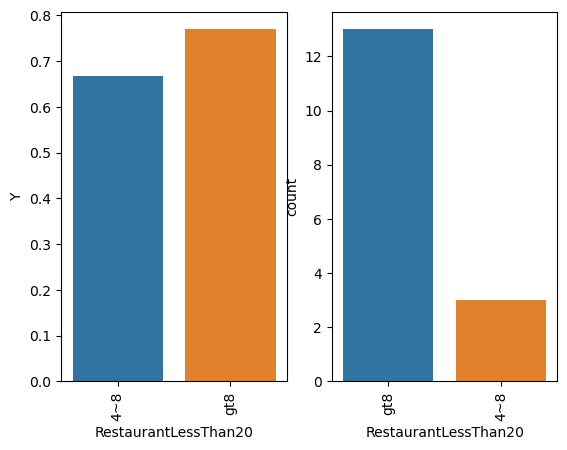

<Figure size 640x480 with 0 Axes>

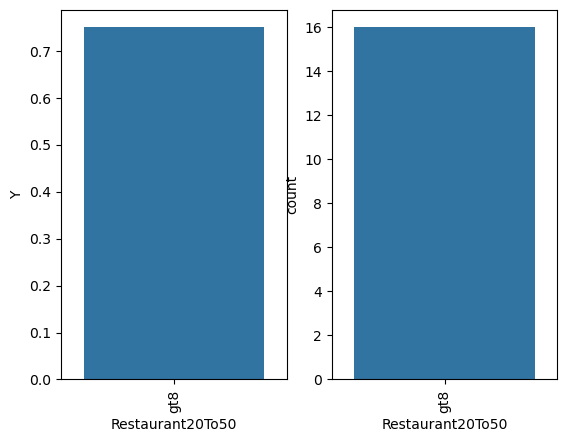

<Figure size 640x480 with 0 Axes>

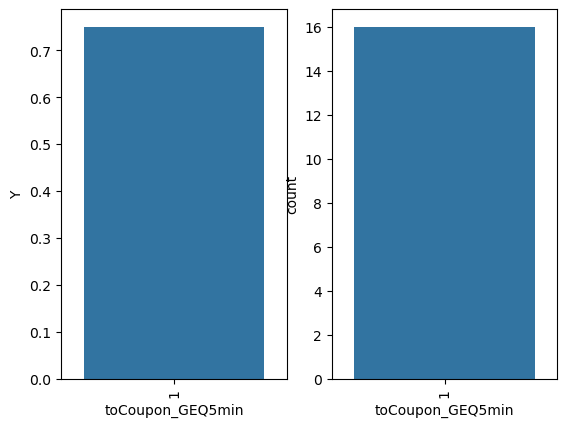

<Figure size 640x480 with 0 Axes>

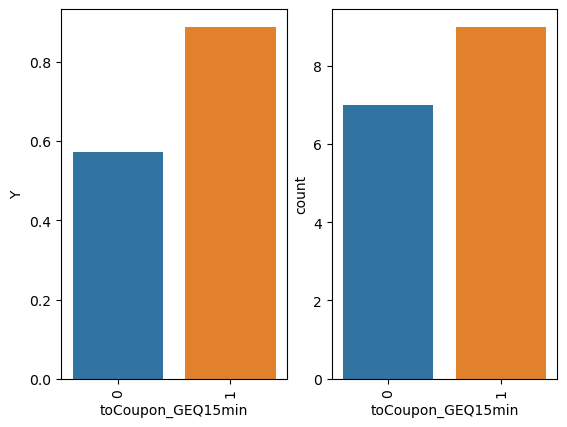

<Figure size 640x480 with 0 Axes>

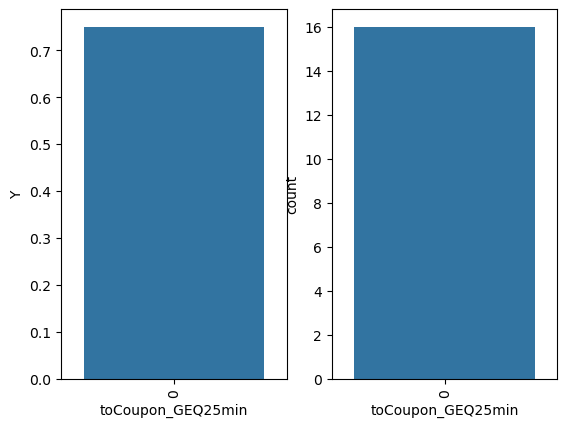

In [569]:
for i in range(22):
    acceptance_rate = data_rst.groupby(cols[i])[['Y']].sum()/data_rst.groupby(cols[i])[['Y']].count()
    acceptance_rate = acceptance_rate.reset_index()
    plt.figure();
    figure, axes = plt.subplots(1, 2);
    sns.barplot(ax=axes[0],data=acceptance_rate, x = cols[i], y='Y');
    sns.countplot(ax=axes[1],data=data_rst, x = cols[i]);
    #plt.pie(row=i+1,col=2,data=data_rst, x = cols[i]);
    axes[0].tick_params('x',labelrotation=90)
    axes[1].tick_params('x',labelrotation=90)


In [654]:
for i in range(22):
    acceptance_rate = data_rst.groupby(cols[i])[['Y']].sum()/data_rst.groupby(cols[i])[['Y']].count()
    pie_rate = data_rst.groupby(cols[i])[['Y']].count() 
    acceptance_rate = acceptance_rate.reset_index()
    pie_rate = pie_rate.reset_index()
    plt.figure();
    fig=px.bar(acceptance_rate, x = cols[i], y='Y');
    fig.show()
    #sns.countplot(data=data_rst, x = cols[i]);
    plt.figure();
    fig = px.pie(pie_rate, names=cols[i], values = 'Y',title='Distribution of coupons for column: ' + cols[i]);
    fig.show();

C:\Users\nsatish\AppData\Local\Temp\ipykernel_22836\2844157166.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [661]:
data_rst = data_clean.query("coupon == 'Restaurant(20-50)' ")
#data_rst_2 = data_rst.query("weather == 'Sunny' and temperature == 80 and expiration == '1d' and (Restaurant20To50 == 'gt8' or Restaurant20To50 == '4~8')")[['Y']]
#data_others_2 = data_rst.query("(weather == 'Sunny' and temperature == 80 and expiration == '1d' and (Restaurant20To50 == 'gt8' or Restaurant20To50 == '4~8')) == False")[['Y']]

data_rst_2 = data_rst.query("(Restaurant20To50 == 'gt8' or Restaurant20To50 == '4~8')")[['Y']]
data_others_2 = data_rst.query("((Restaurant20To50 == 'gt8' or Restaurant20To50 == '4~8')) == False")[['Y']]

# Create a new column Group and give it same identifier 'Age_25+_Bar_1+'  for all rows
data_rst_2.loc[:,'Group'] = 'Group-1' 

#Create a new column Group and give it same identifier 'Others' for all rows
data_others_2.loc[:,'Group'] = 'Group-2' 

#Outer Merge both the above dataframes using columns 'Group' and 'Y'
data_rst_merged =pd.merge(left=data_rst_2, right = data_others_2, left_on = ['Group', 'Y'], right_on = ['Group','Y'], how='outer')

#Perform groupby on column 'Group' and divide sum with count of column 'Y' to get acceptance rate
acceptance_rate = (data_rst_merged.groupby('Group')[['Y']].sum()/data_rst_merged.groupby('Group')[['Y']].count())*100

acceptance_rate = acceptance_rate.reset_index()
fig = px.bar(acceptance_rate, x = 'Group', y='Y')
fig.show()
acceptance_rate

plt.figure()
fig = px.bar(data_rst_merged, x = 'Group');
fig.show()

<Figure size 640x480 with 0 Axes>

In [618]:
data_others_2 = data_rst.query("(weather == 'Sunny' and expiration == '1d' and toCoupon_GEQ15min == 0) == False")[['Y']]

In [620]:
data_rst_2 .head()

,Y,Group
223,1,Group-1
331,1,Group-1
417,1,Group-1
663,1,Group-1
707,1,Group-1
